Source: https://blog.dominodatalab.com/fitting-gaussian-process-models-python/


In [1]:
import numpy as np
 
# Using squared exponential covariance K    
def exponential_cov(x, y, params):
    return params[0] * np.exp( -0.5 * params[1] * np.subtract.outer(x, y)**2)
    # param[0] is vertical scaling factor
    # param[1] is 

# Conditional function (linear algebra B14)
def conditional(x_new, x, y, params):
    B = exponential_cov(x_new, x, params) # SigmaXY
    C = exponential_cov(x, x, params) # SigmaYY
    A = exponential_cov(x_new, x_new, params) # SigmaXX
    mu = np.linalg.inv(C).dot(B.T).T.dot(y)
    sigma = A - B.dot(np.linalg.inv(C).dot(B.T))
    return(mu.squeeze(), sigma.squeeze())


<Container object of 3 artists>

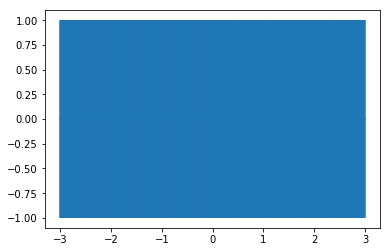

In [2]:
import matplotlib.pylab as plt
%matplotlib inline

θ = [1, 10]
σ_0 = exponential_cov(0, 0, θ)
xpts = np.arange(-3, 3, step=0.01)
plt.errorbar(xpts, np.zeros(len(xpts)), yerr=σ_0, capsize=0)


Now, we define the underlying function y which we will try to predict. We then take the first sample at an arbitrary point x = 1.0

In [3]:
x = [1.] # Make x float type

y = [np.random.normal(scale=σ_0)]

# y = test_function(x)
y

[0.016490651376297273]

Find out what predict() does?

In [4]:
# Update covariance matrix
σ_1 = exponential_cov(x, x, θ)

def predict(x, data, kernel, params, sigma, t):
    k = [kernel(x, y, params) for y in data]
    Sinv = np.linalg.inv(sigma)
    y_pred = np.dot(k, Sinv).dot(t)
    sigma_new = kernel(x, x, params) - np.dot(k, Sinv).dot(k)
    return y_pred, sigma_new

x_pred = np.linspace(-5, 5, 1000)
predictions = [predict(i, x, exponential_cov, θ, σ_1, y) for i in x_pred]


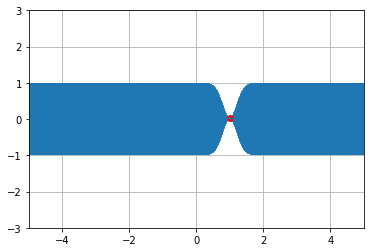

In [5]:
y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")

# Change settings of plot
plt.axis([-5, 5, -3, 3])
plt.grid(True)

In [6]:
m, s = conditional([-0.7], x, y, θ)

y2 = np.random.normal(m, s)

# y2 = test_function(x)

x.append(-0.7)

y.append(y2)

σ_2 = exponential_cov(x, x, θ)

predictions = [predict(i, x, exponential_cov, θ, σ_2, y) for i in x_pred]


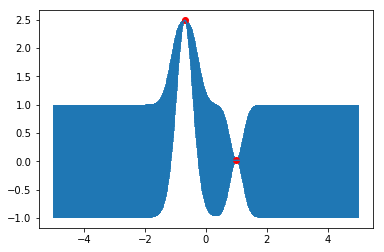

In [7]:
y_pred, sigmas = np.transpose(predictions)

plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)

plt.plot(x, y, "ro")


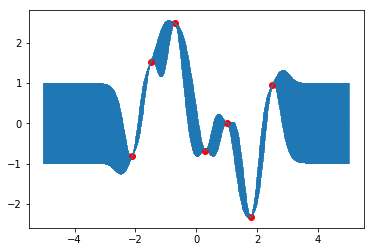

In [8]:
x_more = [-2.1, -1.5, 0.3, 1.8, 2.5]
mu, s = conditional(x_more, x, y, θ)
y_more = np.random.multivariate_normal(mu, s)
# y_more = test_function(x)

x += x_more
y += y_more.tolist()

σ_new = exponential_cov(x, x, θ)
predictions = [predict(i, x, exponential_cov, θ, σ_new, y) for i in x_pred]
y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")


In [9]:
y_more

array([-0.81604384,  1.51337893, -0.67407209, -2.32577729,  0.95321614])